In [1]:
import mdtraj as md

traj = md.load('butane_sim.dcd', top='butane.pdb')

In [2]:
import nglview as ngl

visualize = ngl.show_mdtraj(traj)
visualize

NGLWidget(max_frame=199999)

In [3]:
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


In [5]:
phi_indices = [0, 4, 7, 10] # atoms for torsion
phi = md.compute_dihedrals(traj, [phi_indices])

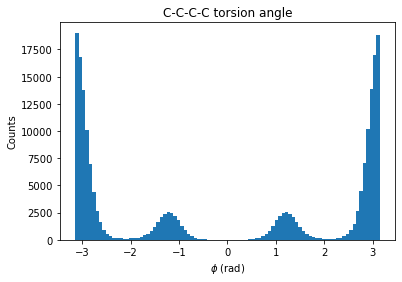

In [6]:
import numpy as np
import matplotlib.pyplot as plt

phicounts, binedges, otherstuff = plt.hist(phi, bins=90)
plt.title('C-C-C-C torsion angle')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Counts')
plt.show()

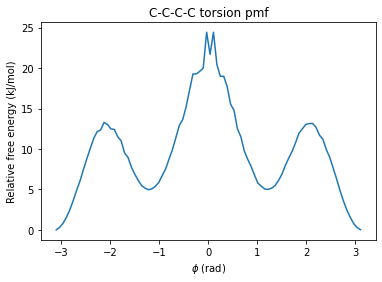

In [7]:
kB = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature
phicounts[phicounts==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(phicounts) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.title('C-C-C-C torsion pmf')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()

In [8]:
theta_indices = [0, 4, 7] # atoms for bend
theta = md.compute_angles(traj, [theta_indices])

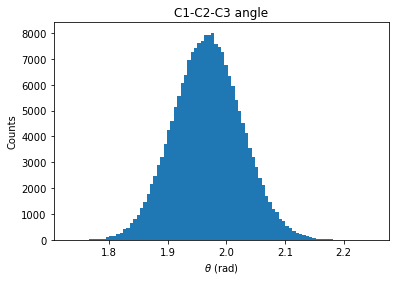

In [9]:
thetacounts, binedges, otherstuff = plt.hist(theta, bins=90)
plt.title('C1-C2-C3 angle')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel('Counts')
plt.show()

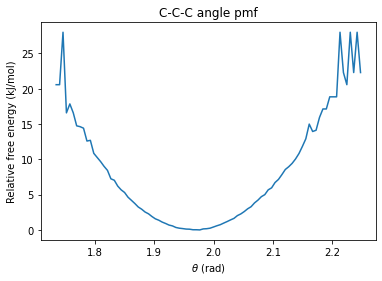

In [10]:
thetacounts[thetacounts==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(thetacounts) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.title('C-C-C angle pmf')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()

In [11]:
bond_indices = [0, 1] # atoms to define bond length
bond_length = md.compute_distances(traj, [bond_indices])

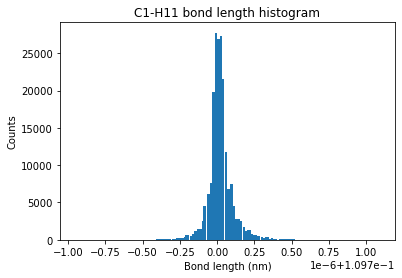

In [12]:
bondcounts, binedges, otherstuff = plt.hist(bond_length, bins=120)
plt.title('C1-H11 bond length histogram')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.show()

In [13]:
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


In [14]:
top=traj.topology
top

<mdtraj.Topology with 1 chains, 1 residues, 14 atoms, 13 bonds at 0x7fcdaef3b6d8>

In [15]:
#Select All Carbon Atoms
C_sel=top.select("type C")
print(C_sel)
#Confirm that we have selected what we think we have
for atom in C_sel:
    print(top.atom(atom))

[ 0  4  7 10]
NBU1-C1
NBU1-C2
NBU1-C3
NBU1-C4


In [16]:
top.atom(2)

NBU1-H12

In [17]:
#Select All hydrogen Atoms
H_sel=top.select("type H")
print(H_sel)
#Confirm that we have selected what we think we have
for atom in H_sel:
    print(top.atom(atom))

[ 1  2  3  5  6  8  9 11 12 13]
NBU1-H11
NBU1-H12
NBU1-H13
NBU1-H21
NBU1-H22
NBU1-H31
NBU1-H32
NBU1-H41
NBU1-H42
NBU1-H43


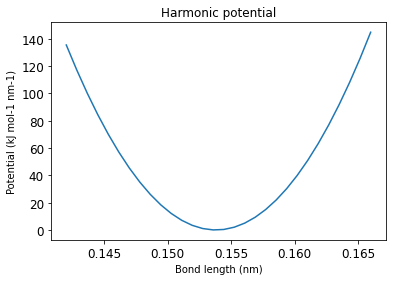

In [18]:
bondlengths=np.linspace(0.142,0.166,30)

#array bond length
def harmonic_bond_E(k,b,b0):
    return k/2*(b-b0)**2

Bond_E=harmonic_bond_E(1945727.27,bondlengths,0.15380)

plt.plot(bondlengths,Bond_E)

plt.title('Harmonic potential')
plt.xlabel('Bond length (nm)')
plt.ylabel('Potential (kJ mol-1 nm-1)')
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

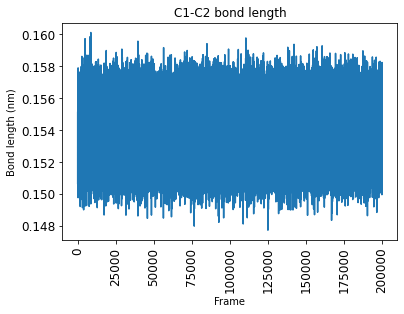

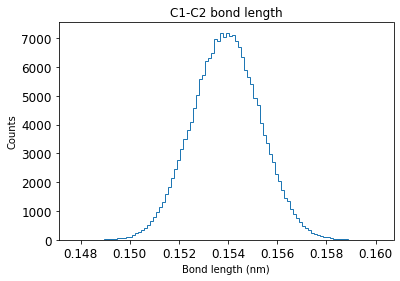

In [19]:
#Compute Some Distances and plot the time course - Bond 0-4
bond_indices = [0, 4] 
C1C2bondlength = md.compute_distances(traj, [bond_indices])

plt.plot(C1C2bondlength)

plt.title('C1-C2 bond length')
plt.xlabel('Frame')
plt.ylabel('Bond length (nm)')
plt.xticks(rotation=90)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

plt.title('C1-C2 bond length')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.xticks(size=12)
plt.yticks(size=12)

plt.hist(C1C2bondlength,bins=100,histtype='step')
plt.show()

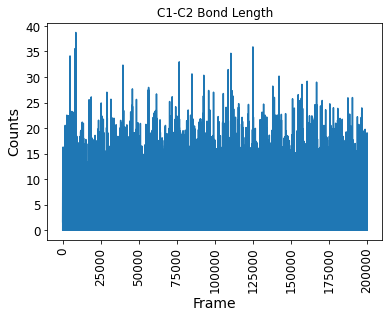

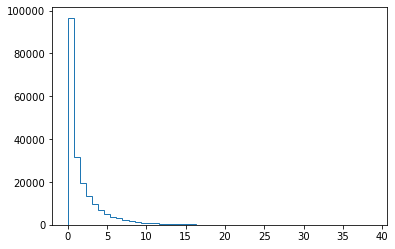

In [20]:
C1C2bond=C1C2bondlength[:,0]

C1C2_BondE=harmonic_bond_E(1945727.27,C1C2bond,0.15380)
plt.plot(C1C2_BondE)

plt.xlabel('Frame', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xticks(rotation=90)
plt.ylabel('Counts', size=14)
plt.title('C1-C2 Bond Length')
plt.show()
plt.clf()

plt.hist(C1C2_BondE,histtype='step',bins=50)
plt.show()

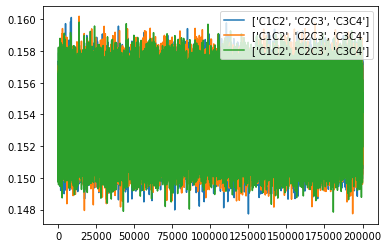

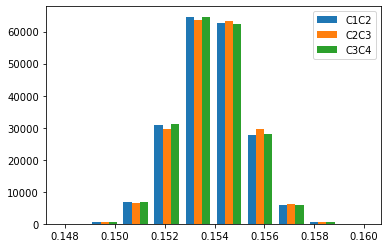

In [21]:
bond_indices = [[0, 4],[4, 7],[7, 10]]
CC_bondlengths = md.compute_distances(traj, bond_indices)

C1C2_bond=CC_bondlengths[:,0]
C2C3_bond=CC_bondlengths[:,1]
C3C4_bond=CC_bondlengths[:,2]

plt.plot(CC_bondlengths,label=['C1C2','C2C3','C3C4'])
plt.legend()
plt.show()
plt.clf()

plt.hist(CC_bondlengths,label=['C1C2','C2C3','C3C4'])
plt.legend()

In [22]:
ave=np.average(C1C2_bond)
var=np.var(C1C2_bond)
std=np.std(C1C2_bond)

print("Average:",ave,"Varience:",var,"Standard Deviation:",std)

Average: 0.153901 Varience: 1.8879479e-06 Standard Deviation: 0.0013740262


R2: -0.09770568073352653
Line Parameters: [0.50013667 0.07697459]


/usr/local/anaconda3/envs/omm/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


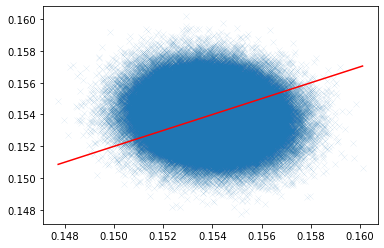

Line Parameters: [0.49998748 0.07695163]


/usr/local/anaconda3/envs/omm/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


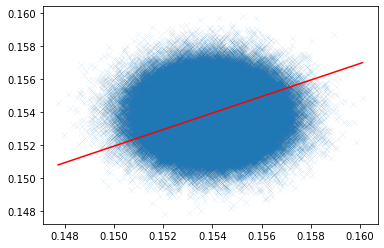

R2: 0.006188427300952072


<Figure size 432x288 with 0 Axes>

In [23]:
#####Are these bond lengths correlated?##### 
###Calculate and plot a best fit line, and calculate the correlation coefficient####

#plt.scatter(C1C2bondlength,C2C3bondlength,marker='x',linewidth=0.05)
#######SOLUTION###########

plt.scatter(C1C2_bond,C2C3_bond,marker='x',linewidth=.05)

r2=np.corrcoef(C1C2_bond,C2C3_bond)[0,1]
print("R2:",r2)

line_fit=np.polyfit(C1C2_bond,C2C3_bond,1)
x = np.linspace(min(C1C2_bond), max(C1C2_bond),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

plt.scatter(C1C2_bond,C3C4_bond,marker='x',linewidth=.05)
x = np.linspace(min(C1C2_bond), max(C1C2_bond),20)
line_fit=np.polyfit(C1C2_bond,C3C4_bond,1)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r2=np.corrcoef(C1C2_bond,C3C4_bond)[0,1]

print("R2:",r2)

In [24]:
bond_indices = [4, 7] 
C2C3bondlength = md.compute_distances(traj, [bond_indices])

bond_indices = [7, 10] 
C3C4bondlength = md.compute_distances(traj, [bond_indices])

In [25]:
###SOLUTION###
def variance(data):
    ave=np.average(data)
    var= np.average((data-ave)**2)
    std=var**0.5
    return var,std

C1C2var,C1C2std=variance(C1C2bondlength)
C2C3var,C2C3std=variance(C2C3bondlength)
C3C4var,C3C4std=variance(C3C4bondlength)
print("C1-C2 var:",C1C2var,"C2-C3 var:",C2C3var,"C3-C4 var:",C3C4var)
print("C1-C2 std:",C1C2std,"C2-C3 std:",C2C3std,"C3-C4 std:",C3C4std)

C1-C2 var: 1.8879479e-06 C2-C3 var: 1.9025352e-06 C3-C4 var: 1.8742921e-06
C1-C2 std: 0.0013740261497760763 C2-C3 std: 0.0013793241989431652 C3-C4 std: 0.0013690478948458528


a: 0.18688160588432629 x0: 0.15390264540309298 fit_sigma: -0.001387682183815719


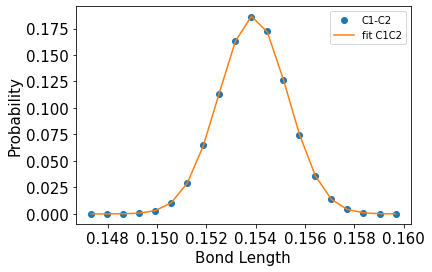

In [26]:
#Lets calculate a Probability Density and fit a gaussian to these
#First lets pull out the data in a formate we can fit
#https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

from scipy.optimize import curve_fit

#First we convery our histogram into bin centers and probabilities
#isntead of bin edges and counts:

counts, edges = np.histogram(C1C2bond, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)

###Now we define a gaussian function that we'll fit to our probability densities

def histogram_bincenters(a,x0,xmax,bins):
    counts, edges = np.histogram(a, bins=bins, range=[x0, xmax])
    centers = edges[:-1] + np.diff(edges)/2
    density=counts/np.sum(counts)
    return density, centers


def gauss(x, a, x0, sigma):
    return (a*np.exp(-(x-x0)**2/(2*sigma**2)))

#### Now we define a function to fit the gaussian with curve fit

def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss, x, y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(centers, fit_a, fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma] 




C1C2_density,centers=histogram_bincenters(C1C2bond,0.147,0.160,20)

C1C2_fit,C1C2_fit_params=fit_gauss(centers,C1C2_density)

plt.plot(centers, C1C2_density, 'o', label='C1-C2')
plt.plot(centers, C1C2_fit, '-', label='fit C1C2')

plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()


a: 0.18688160588432629 x0: 0.15390264540309298 fit_sigma: -0.001387682183815719
a: 0.1864932546701239 x0: 0.15395091459821147 fit_sigma: -0.0013900741000347663
a: 0.1875839214835781 x0: 0.15390206631104086 fit_sigma: -0.001382413825309498


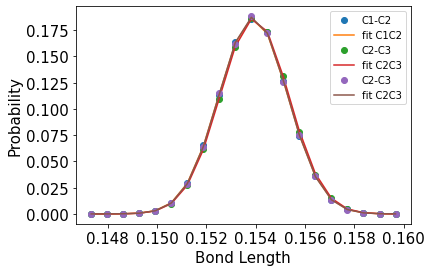

In [27]:
C1C2_density,centers=histogram_bincenters(C1C2bond,0.147,0.160,20)

C1C2_fit,C1C2_fit_params=fit_gauss(centers,C1C2_density)

plt.plot(centers, C1C2_density, 'o', label='C1-C2')
plt.plot(centers, C1C2_fit, '-', label='fit C1C2')

counts, edges = np.histogram(C2C3_bond, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)

C2C3_density,centers=histogram_bincenters(C2C3_bond,0.147,0.160,20)

C2C3_fit,C2C3_fit_params=fit_gauss(centers,C2C3_density)

plt.plot(centers, C2C3_density, 'o', label='C2-C3')
plt.plot(centers, C2C3_fit, '-', label='fit C2C3')


counts, edges = np.histogram(C3C4_bond, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)

C2C3_density,centers=histogram_bincenters(C3C4_bond,0.147,0.160,20)

C2C3_fit,C2C3_fit_params=fit_gauss(centers,C2C3_density)

plt.plot(centers, C2C3_density, 'o', label='C2-C3')
plt.plot(centers, C2C3_fit, '-', label='fit C2C3')

plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()




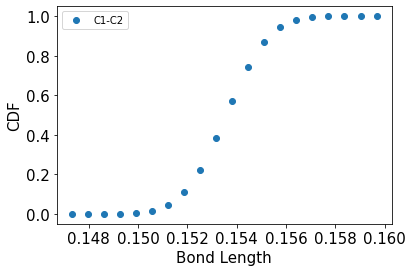

In [28]:
#Create CDF plot of C1C2 bond for the lols

#First we convery our histogram into bin centers and probabilities
#isntead of bin edges and counts:

counts, edges = np.histogram(C1C2bond, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=np.cumsum(counts)/np.sum(counts)

###Now we define a gaussian function that we'll fit to our probability densities

def histogram_bincenters(a,x0,xmax,bins):
    counts, edges = np.histogram(a, bins=bins, range=[x0, xmax])
    centers = edges[:-1] + np.diff(edges)/2
    density=np.cumsum(counts)/np.sum(counts)
    return density, centers

C1C2_density,centers=histogram_bincenters(C1C2bond,0.147,0.160,20)

plt.plot(centers, C1C2_density, 'o', label='C1-C2')

plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('CDF', size=15)
plt.yticks(size=15)
plt.show()

a: -1.6638905084283555 x0: -1.7890356521748714 fit_sigma: 0.13944166462905438


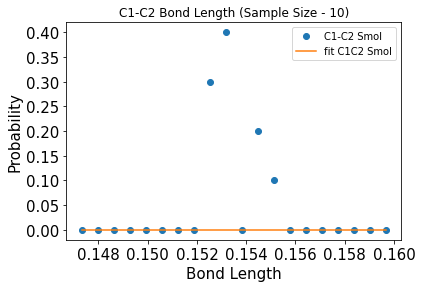

a: 0.16769301980589524 x0: 0.15372221686782608 fit_sigma: -0.0015942078597135038


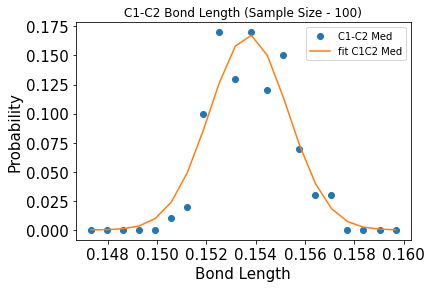

a: 0.18722150706584714 x0: 0.15395082726908946 fit_sigma: -0.0013807313432005006


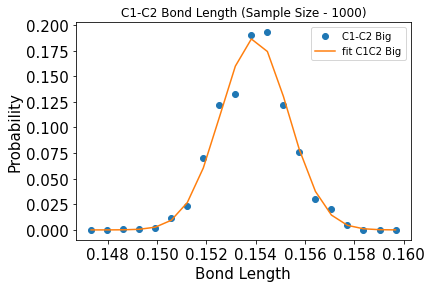

In [31]:
import random

#ADD CODE FOR Random Samples here#
#Draw 10,100,1000 random samples of a bond angle,

smol=random.choices(C1C2_bond,k=10)
med=random.choices(C1C2_bond,k=100)
big=random.choices(C1C2_bond,k=1000)

def histogram_bincenters(a,x0,xmax,bins):
    counts, edges = np.histogram(a, bins=bins, range=[x0, xmax])
    centers = edges[:-1] + np.diff(edges)/2
    density=counts/np.sum(counts)
    return density, centers

counts, edges = np.histogram(smol, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)

smol_density,centers=histogram_bincenters(smol,0.147,0.160,20)
smol_fit,smol_fit_params=fit_gauss(centers,smol_density)

plt.plot(centers, smol_density, 'o', label='C1-C2 Smol')
plt.plot(centers, smol_fit, '-', label='fit C1C2 Smol')

plt.title('C1-C2 Bond Length (Sample Size - 10)')
plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()

counts, edges = np.histogram(med, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)

med_density,centers=histogram_bincenters(med,0.147,0.160,20)
med_fit,med_fit_params=fit_gauss(centers,med_density)

plt.plot(centers, med_density, 'o', label='C1-C2 Med')
plt.plot(centers, med_fit, '-', label='fit C1C2 Med')

plt.title('C1-C2 Bond Length (Sample Size - 100)')
plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()

counts, edges = np.histogram(big, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)

big_density,centers=histogram_bincenters(big,0.147,0.160,20)
big_fit,big_fit_params=fit_gauss(centers,big_density)

plt.plot(centers, big_density, 'o', label='C1-C2 Big')
plt.plot(centers, big_fit, '-', label='fit C1C2 Big')

plt.title('C1-C2 Bond Length (Sample Size - 1000)')
plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()


No handles with labels found to put in legend.


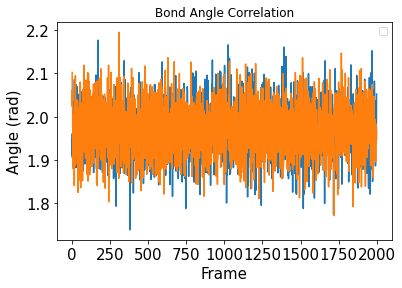

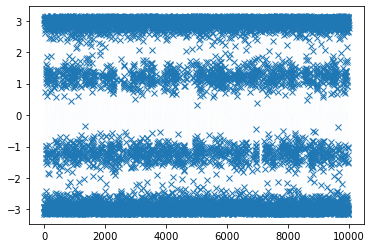

In [35]:
#Lets Compute Some Bond Angles 
Angle1=[0,4,7]
Angle2=[4,7,10]

ang = md.compute_angles(traj,[Angle1,Angle2])
#ang=np.degrees(angle_rad)

ang1=ang[:,0]
ang2=ang[:,1]

plt.plot(ang1[::100])
plt.plot(ang2[::100])

plt.title('Bond Angle Correlation')
plt.legend()
plt.xlabel('Frame', size=15)
plt.xticks(size=15)
plt.ylabel('Angle (rad)', size=15)
plt.yticks(size=15)
plt.show()
plt.show()

dihe = md.compute_dihedrals(traj,[[0,4,7,10]])
plt.plot(dihe[::20],marker="x",linewidth=0.001)

plt.show()

TypeError: expected 1D vector for x

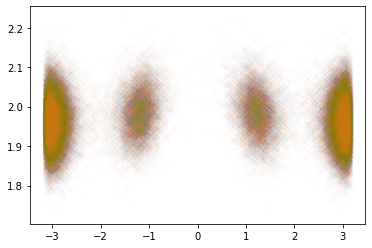

In [37]:
#Are the bond angle and dihedral correlated?

plt.scatter(dihe[::5],ang1[::5],marker="x",linewidth=0.01)
plt.scatter(dihe[::5],ang2[::5],marker="x",linewidth=0.01)

line_fit=np.polyfit(dihe,ang1,1)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r2=np.corrcoef(C1C2_bond,C3C4_bond)[0,1]

print("R2:",r2)

plt.show()

plt.scatter(ang1[1:-1:10],ang2[1:-1:10],marker='x',linewidth=0.01)
r=np.corrcoef(ang1, ang2)
print("Angle Correlation r^2:",r[0,1])

